# Exploration of Prosper Loan Data
## by Truls Møller

## Introduction

The Prosper Loan dataset is a file on 113,937 personal loans that were originated between 2005 and 2014.

My analysis will focus on:
- **High-level overview** of the data.
- **Variables that seem (at least to me) relevant to decisions by the Lender _at the time a new loan gets originated_**, with the help of univariate plots to answer any questions that may arise.
- **Interaction between the variables** with the help of bivariate and multivariate plots to answer any questions that may arise on the interactions.

My analysis will _not_ focus on:
- Variables that become relevant in case of payment problems - defaulted and chargedoff loans - variables such as credit lines, recovery payments.

Here is a breakdown of the relevant variables in three categories.

1) BASIC LOAN DATA
- ListingCategory (numeric) : The category of listing. 20 categories from Debt Consolidation to Wedding Loans denoted with a number in the range 0-20 without any description.
- **ListingCategory** The category of listing. 20 categories from Debt Consolidation to Wedding Loans denoted with a number in the range 0-20 _with_ description.
- **LoanOriginationDate**: The date the loan was originated.
- **LoanOriginalAmount** : The origination amount of the loan.
- **BorrowerAPR**: The Borrower’s Annual Percentage Rate for the loan. (Yearly interest rate)
- **Term**: The duration of the loan in months (Three different durations found: 12, 36, 60 months, ie. 1, 3, 5 years)
- **Loan Status**: The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a time range on how long it is past due.

2) CREDIT GRADES / PROSPER RATINGS DATA
- CreditGrade : The Credit rating that was assigned at the time the listing went live. Used for listings pre-2009 only.
- ProsperRating (Alpha) : The Prosper Rating assigned at the time the listing was created, between AA - HR. Used for listings post-2008 only, hence complementary to CreditGrade.
- **ProsperRating** : Added column. It is the same as 'ProsperRating (Alpha)' only the missing data are populated from CreditGrade. This provides a nice continuity over time.

3) DATA THAT MIGHT HAVE AFFECTED CREDIT GRADES / PROSPER RATINGS
- **EmploymentStatus** Whether the borrower is employed, full-time, part-time, retired etc.
- **IncomeRange** : The income range of the borrower at the time the listing was created.
- **Borrower State** Two letter abbreviation of the state of the address of the borrower at the time of listing.
- **IsBorrowerHomeowner** True or False.
- **OnTimeProsperPayments** : Number of past on time payments (less that one month late) at the time of listing. Null if there are no prior loan history.
- **Recommendations** : Number of recommendations the borrower had at the time of listing.

All these variables will be used in our analysis, but only the ones in **bold** will be used explicitly.

## Preliminary Wrangling

In [1]:
# import all packages, set plots to be embedded inline and set max display metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

Loading the dataset:

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

High level overview of data shape and composition:

In [3]:
print(df.shape)
print(df.dtypes)

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


We do some conversions of data type:

In [12]:
# We convert the 'Date' columns to datetime format

date_columns = ['ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 'LoanOriginationDate']

for i in date_columns:
    df[i]= pd.to_datetime(df[i]).dt.normalize()

In [13]:
# We convert 'ListingNumber' and 'Term' to string type

df['ListingNumber'] = df['ListingNumber'].astype('str')
df['Term'] = df['Term'].astype('str')

Before we do conversions for categorical variables, we create a new column 'ProsperRating' where we first take all the data from column 'ProsperRating (Alpha)'s and then populate its missing values (pre-2009) with data from 'CreditGrade'. 

Note: This isn't perfect, but it follows the same rating scale (AA - A - B - C - D - E - HR), so it will give us some nice continuity across a gap in the data around the time of the 2008 financial crisis.

In [51]:
# We create the new column where we first take all the data from column 'ProsperRating (Alpha)'s 
# and then populate its missing values (pre-2009) with data from 'CreditGrade'.

df['ProsperRating'] = df['ProsperRating (Alpha)'].fillna(df['CreditGrade'])

# We check for missing data in our new column
df['ProsperRating'].isna().sum()

131

In [60]:
# We remove the missing data with pandas notnull function

df = df[pd.notnull(df['ProsperRating'])]

In [52]:
# The CreditGrade column also carried an extra value 'NC', 
# which we interpret as missing data as well ("Not Counted")

df['ProsperRating'].value_counts()

C     23994
B     19970
D     19427
A     17866
E     13084
HR    10443
AA     8881
NC      141
Name: ProsperRating, dtype: int64

In [61]:
# We remove that as well

df = df[df.ProsperRating != 'NC']

In [62]:
# and verify that we only have the mentioned ratings that we want

df['ProsperRating'].value_counts()

C     23994
B     19970
D     19427
A     17866
E     13084
HR    10443
AA     8881
Name: ProsperRating, dtype: int64

In [72]:
# We also remove the missing data in 'BorrowerAPR' with pandas notnull function

df = df[pd.notnull(df['BorrowerAPR'])]

One more step before we can move on to conversions for categorical variables:

In [76]:
# We want to add a column 'ListingCategory' and populate it 
# based on 'ListingCategory (numeric)'.

# First we create a dict for mapping between them
d = {0 : '0. Not Available',
     1 : '1. Debt Consolidation',
     2 : '2. Home Improvement', 
     3 : '3. Business', 
     4 : '4. Personal Loan', 
     5 : '5. Student Use',
     6 : '6. Auto',
     7 : '7. Other',
     8 : '8. Baby and Adoption', 
     9 : '9. Boat', 
     10 : '10. Cosmetic Procedure', 
     11 : '11. Engagement Ring',
     12 : '12. Green Loans',
     13 : '13. Household Expenses',
     14 : '14. Large Purchases',
     15 : '15. Medical/Dental',
     16 : '16. Motorcycle',
     17 : '17. RV',
     18 : '18. Taxes',
     19 : '19. Vacation',
     20 : '20. Wedding Loans'}

# we initialize the new column:

df['ListingCategory'] = '0. Not Available'

# and then we populate it.

for key in d:
    df.loc[df['ListingCategory (numeric)'] == key,'ListingCategory'] = d[key]

Great. Now we will perform conversions for categorical variables

In [64]:
# We convert Term, LoanStatus, ListingCategory and IncomeRange
# into ordered categorical types.

ordinal_var_dict = {'Term': ['12','36','60'],
                    'LoanStatus': ['Current', 'Completed','FinalPaymentInProgress', 
                                   'Past Due (1-15 days)', 'Past Due (16-30 days)', 
                                   'Past Due (31-60 days)', 'Past Due (61-90 days)', 
                                   'Past Due (90-120 days)', 'Past Due (>120 days)', 
                                   'Chargedoff', 'Defaulted'],
                    'ListingCategory': list(d.values()),
                    'IncomeRange': ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'],
                    'EmploymentStatus': ['Employed', 'Self-employed', 'Full-time', 'Part-time', 'Retired', 'Other', 'Not employed', 'Not available'], 
                    'ProsperRating': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

Let us inspect the data types

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113665 entries, 0 to 113936
Data columns (total 83 columns):
ListingKey                             113665 non-null object
ListingNumber                          113665 non-null object
ListingCreationDate                    113665 non-null datetime64[ns]
CreditGrade                            28812 non-null object
Term                                   113665 non-null category
LoanStatus                             113356 non-null category
ClosedDate                             54817 non-null datetime64[ns]
BorrowerAPR                            113641 non-null float64
BorrowerRate                           113665 non-null float64
LenderYield                            113665 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64


We see that the categorical data types are indeed there, and among them at the very bottom of the output we notice our new columns 'ListingCategory' and 'ProsperRating'.

### What is the structure of your dataset?

In [75]:
df.shape

(113641, 83)

There were initially 113,937 loan listings (rows) and 81 variables of data (columns) in the raw dataset.
We have dropped some rows due to missing data in key columns, and we have added two new columns.
Now we have 113,641 loan listings (rows) and 83 variables of data (columns).

As stated in the Introduction, we will focus on 13 variables:
- 1 is a datetime variable: 'LoanOriginationDate'.
- 6 are categorical variables: 'Term', 'LoanStatus', 'ListingCategory', 'IncomeRange', 'EmploymentStatus' and 'ProsperRating'.
- 4 are numeric variables: 'LoanOrginationAmount', 'BorrowerAPR', 'OnTimeProsperPayments', 'Recommendations'.
- 1 is a boolean variable: 'IsBorrowerHomeowner'.
- 1 is of string format: 'BorrowerState'


### What is/are the main feature(s) of interest in your dataset?

As stated in the Introduction, I will focus on the variables that seem relevant to decisions by the Lender at the time a new loan gets originated, as well as the clearly dependent variables 'ProsperRating' and 'BorrowerAPR'.

I am interested to find out:
- How does ProsperRating and the borrower’s APR (annual percentage rate) correlate?
- How does LoanOrginationAmount correlate with the borrower’s APR?
- Which seems to be the best predictor of a high ProsperRating - is it EmploymentStatus, IncomeRange, BorrowerState, IsBorrowerHomeowner, OnTimeProsperPayments or Recommendations?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

It is only logical that 'ProsperRating' and 'BorrowerAPR' are dependent on each other, and both are calculated/decided by the Lender.

I would guess that 'LoanOrginationAmount' is a good predictor of the two. Small loans often have high interest rates.

'EmploymentStatus', 'IncomeRange', 'BorrowerState', 'IsBorrowerHomeowner', OnTimeProsperPayments and Recommendations might be helpful as well, but I do not have any clear opinion on which is better among these.

There is also the time aspect. We might discover some variations over time. If so, and if we wish to explore it, LoanOriginationDate will be absolutely cruicial.

## High Level Overview

We know the number of loans is a bit above 113k.

What is the total amount for all the loans? And what is the average amount?

In [78]:
print("Total loan amount: $ {:,.0f}".format(df['LoanOriginalAmount'].sum()))
print("Avg. loan amount: $ {0:,.0f}".format(df['LoanOriginalAmount'].mean()))

Total loan amount: $ 948,929,675
Avg. loan amount: $ 8,350


The total loan amount is nearly USD 1 billion, and the average loan amount a bit more than USD 8,000.

#### Time Range

In [83]:
print(df.ListingCreationDate.dt.date.min())
print(df.ListingCreationDate.dt.date.max())

2006-01-06
2014-03-10


The data ranges from 

## Univariate Exploration

Q: What are the most common loan amounts?

In [20]:
df['LoanOriginalAmount'].value_counts()

4000     14333
15000    12407
10000    11106
5000      6990
2000      6067
         ...  
14383        1
6251         1
14447        1
6379         1
4098         1
Name: LoanOriginalAmount, Length: 2468, dtype: int64

A: The top 3 most common loan amounts each occur more than 10,000 times, and they are:
1. USD 4,000 (14k times)
2. USD 15,000 (12k times)
3. USD 10,000 (11k times)

We also note that there are "unique" amounts that occur only once.

Q: How does the loan amount distribution look in a plot?

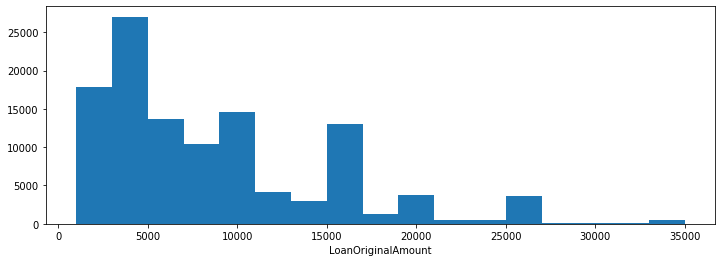

In [21]:
# We will use a histogram for this
plt.figure(figsize = [12,4])
bin_edges = np.arange(1000, df['LoanOriginalAmount'].max() + 2000, 2000)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bin_edges)
plt.xlabel('LoanOriginalAmount');

We can see that there seems to be a lot of smaller loans between \\$1,000 and \\$11,000, and there is a right-skew.

It would be nice to understand better what goes on around the peaks.

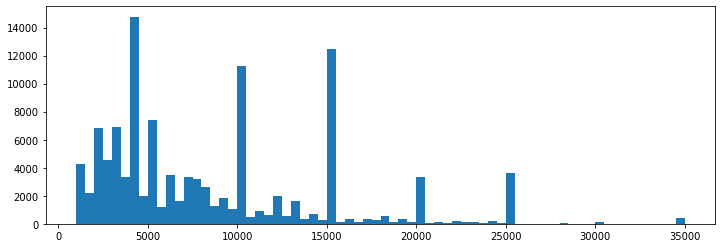

In [22]:
# We will use a histogram again and decrease the bin width compared to last time.
plt.figure(figsize = [12,4])
bin_edges = np.arange(1000, df['LoanOriginalAmount'].max() + 500, 500)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bin_edges);

We now recognize the top 3 most common loan amounts: \\$4,000, \\$10,000, \\$15,000, and there seems to be peaks at several round numbers, giving us a multimodal picture.

Maybe we will see some gaps if zoom in even more on those peaks.

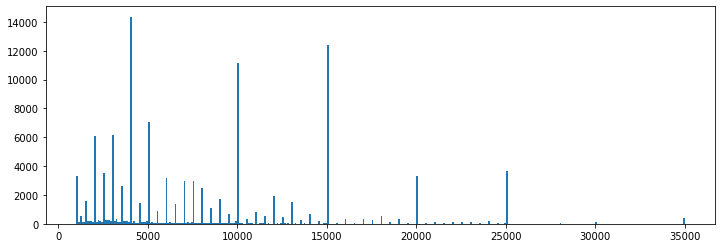

In [23]:
# We will use a histogram again and decrease the bin width even more.
plt.figure(figsize = [12,4])
bin_edges = np.arange(1000, df['LoanOriginalAmount'].max() + 100, 100)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bin_edges);

Now we see more clearly that the loan amounts are almost discrete. However there are some odd amounts in between with significantly fewer occurrences than the peaks.

Ok. Now we have a better grasp. And it does make sense that most loan issued are in nice, round numbers.

Q: How are these loans distributed over time?

We have both the 'ListingCreationDate' and the 'LoanOriginationDate' to answer this.

C:\Anaconda3\envs\dand\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


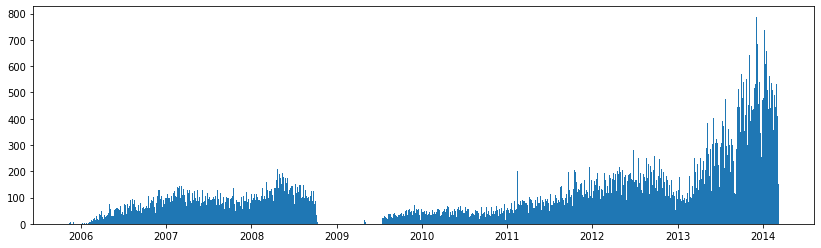

In [24]:
plt.figure(figsize = [14,4])
plt.hist(data = df, x = 'ListingCreationDate', bins = 1000);

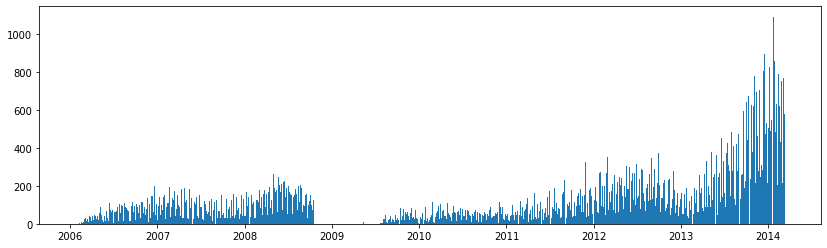

In [85]:
plt.figure(figsize = [14,4])
plt.hist(data = df, x = 'LoanOriginationDate', bins = 1000);

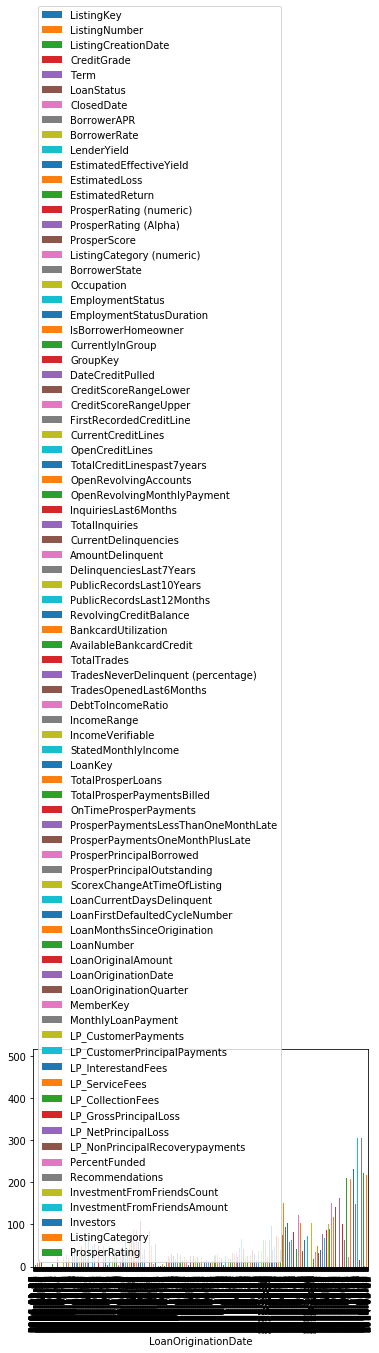

In [87]:
df.groupby(df["LoanOriginationDate"].dt.date).count().plot(kind="bar")

The two plots are very similar. This makes sense because every loan gets listed, and shortly thereafter it gets originated.

Both time series show there a gap in the data between the fall of 2008 and the mid of 2009. It seems to coincide with the 2008 financial crisis. After the mid of 2009 the volume picks up for Prosper and, after a dip in late 2012, it takes off and the volume more than doubles the next 12 months!

Q: How can the small gaps in the 'LoanOriginationDate' time series be explained?

In [26]:
# We see that a loan may be listed any day of the week, even in the weekend 
# How to read below list: 0 - Mon, 1 - Tue, 2 - Wed, 3 - Thu, 4 - Fri, 5 - Sat, 6 - Sun

df.ListingCreationDate.dt.weekday.value_counts()

1    19946
0    19594
2    19057
3    17962
4    16136
5    10758
6    10484
Name: ListingCreationDate, dtype: int64

In [27]:
# However, we see that a loan may not be originated on Saturdays or Sundays

df.LoanOriginationDate.dt.weekday.value_counts()

1    27288
2    25266
4    21793
3    21727
0    17863
Name: LoanOriginationDate, dtype: int64

Q: What is a typical time difference between them?

In [28]:
(df.LoanOriginationDate - df.ListingCreationDate).median()

Timedelta('9 days 00:00:00')

The median time delta from listing till origination is 9 days.

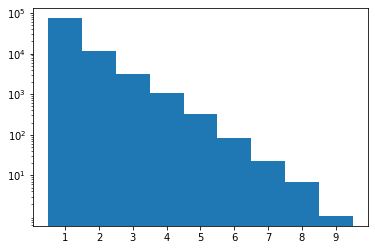

In [29]:
y = df['MemberKey'].value_counts()
y = pd.DataFrame(y)
#y['number_of_loans'] = y.index
bin_edges = np.arange(0.5, 9.5 + 1, 1)
plt.hist(data = y, x = 'MemberKey', bins = bin_edges)
plt.yscale('log')
plt.xticks(np.arange(1, 9 + 1, 1))

plt.yticks([10, 100, 1000, 10000, 100000]);

In [30]:
x = df['MemberKey'].value_counts().value_counts()
x = x.T
x = pd.DataFrame(x)
x['number_of_borrowers'] = x['MemberKey']
x['number_of_loans'] = x.index

In [31]:
x

,MemberKey,number_of_borrowers,number_of_loans
1,74423,74423,1
2,11764,11764,2
3,3168,3168,3
4,1048,1048,4
5,317,317,5
6,81,81,6
7,22,22,7
8,7,7,8
9,1,1,9


In [32]:
dfa = df[df['ListingCreationDate'].dt.year < 2009]
dfb = df[df['ListingCreationDate'].dt.year > 2008]

In [33]:
dfb.describe()

,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,84881.000000,84881.000000,84881.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,84881.000000,84862.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000,77584.000000,8.488100e+04,19822.000000,19822.000000,19822.000000,19822.000000,19822.000000,19822.000000,19822.000000,16667.000000,84881.000000,6247.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000,84881.000000
mean,0.226647,0.196011,0.186007,0.168661,0.080306,0.096068,4.072243,5.950067,3.312626,103.050942,699.389969,718.389969,10.508206,9.528469,27.657308,7.386093,430.658051,0.964609,4.291278,0.322345,950.460162,3.658722,0.285070,0.009166,17937.659759,0.564184,11401.432452,23.928912,0.905917,0.729916,0.258738,5.930753e+03,1.460599,24.297044,23.584149,0.660075,0.052820,8753.271916,2916.576123,-4.628247,36.648202,14.476229,16.035520,86576.173007,9081.579447,291.874869,3668.826503,2626.800692,1042.025811,-54.633773,-8.203361,375.964736,367.603578,7.644542,0.998099,0.017601,0.008047,4.314134,68.276552
std,0.079919,0.074634,0.074634,0.068467,0.046764,0.030403,1.673227,2.376501,4.363802,97.071403,47.095869,47.095869,5.317332,4.931419,13.267350,4.515698,425.830912,1.399768,3.828582,1.111828,7418.370900,9.346852,0.648288,0.125968,31363.095204,0.301728,18610.355338,11.609185,0.121363,0.992878,0.318298,8.238744e+03,0.790270,19.764433,19.345873,2.569429,0.583897,7540.198411,3807.201330,50.596203,150.498931,7.336501,13.911568,28896.359042,6287.801238,186.679293,4233.461427,3621.153115,1135.852285,59.724957,75.173280,1720.498825,1699.943791,119.145702,0.020738,0.188053,0.109703,116.986714,95.194034
min,0.045830,0.040000,0.030000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,600.000000,619.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,1.000000,0.000000,38030.000000,1000.000000,0.000000,-2.349900,0.000000,-2.349900,-589.950000,-4865.080000,-94.200000,-504.410000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,0.163280,0.135900,0.125900,0.115670,0.042400,0.074080,3.000000,4.000000,1.000000,30.000000,660.000000,679.000000,7.000000,6.000000,18.000000,4.000000,156.000000,0.000000,2.00000

In [34]:
print('CreditScoreRangeLower min/max:')
print(dfb['CreditScoreRangeLower'].min())
print(dfb['CreditScoreRangeLower'].max())
print('\n')
print('CreditScoreRangeUpper min/max:')
print(dfb['CreditScoreRangeUpper'].min())
print(dfb['CreditScoreRangeUpper'].max())

CreditScoreRangeLower min/max:
600.0
880.0


CreditScoreRangeUpper min/max:
619.0
899.0


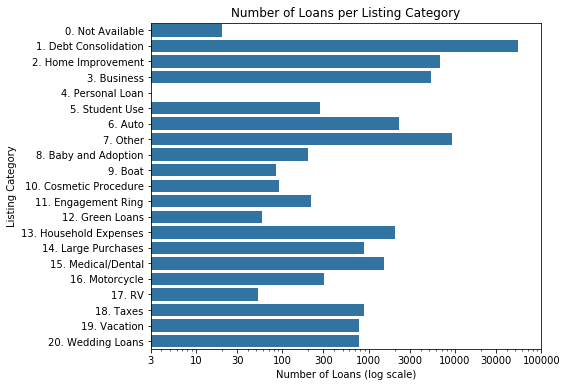

In [35]:
base_color = sb.color_palette()[0]
plt.subplots(figsize = [7,6])
sb.countplot(data = dfb, y = 'ListingCategory', color = base_color, order = list(d.values()));
plt.title("Number of Loans per Listing Category")
plt.xscale('log')
tick_locs = [3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
plt.xticks(tick_locs, tick_locs)
plt.xlabel("Number of Loans (log scale)")
plt.ylabel("Listing Category");

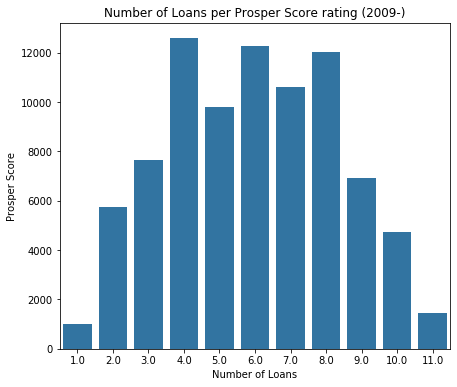

In [36]:
base_color = sb.color_palette()[0]
plt.subplots(figsize = [7,6])
sb.countplot(data = dfb, x = 'ProsperScore', color = base_color)
plt.title("Number of Loans per Prosper Score rating (2009-)")
plt.xlabel("Number of Loans")
plt.ylabel("Prosper Score");

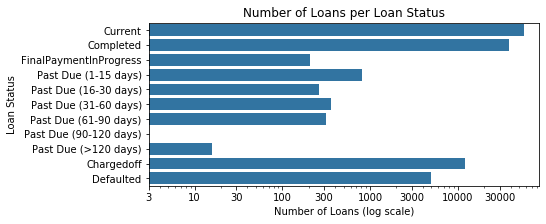

In [37]:
tick_locs = [3, 10, 30, 100, 300, 1000, 3000, 10000, 30000]
base_color = sb.color_palette()[0]
plt.subplots(figsize = [7,3])
sb.countplot(data = df, y = 'LoanStatus', color = base_color);
plt.title("Number of Loans per Loan Status")
plt.xscale('log')
plt.xticks(tick_locs, tick_locs)
plt.xlabel("Number of Loans (log scale)")
plt.ylabel("Loan Status");

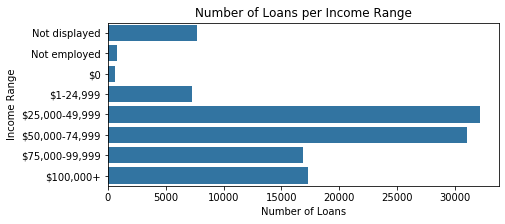

In [38]:
base_color = sb.color_palette()[0]
plt.subplots(figsize = [7,3])
sb.countplot(data = df, y = 'IncomeRange', color = base_color);
plt.title("Number of Loans per Income Range")
plt.xlabel("Number of Loans")
plt.ylabel("Income Range");

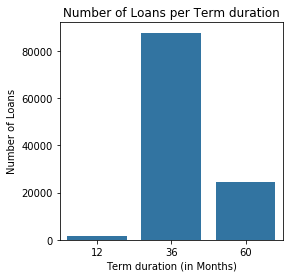

In [39]:
base_color = sb.color_palette()[0]
plt.subplots(figsize = [4,4])
sb.countplot(data = df, x = 'Term', color = base_color);
plt.title("Number of Loans per Term duration")
plt.ylabel("Number of Loans")
plt.xlabel("Term duration (in Months)");

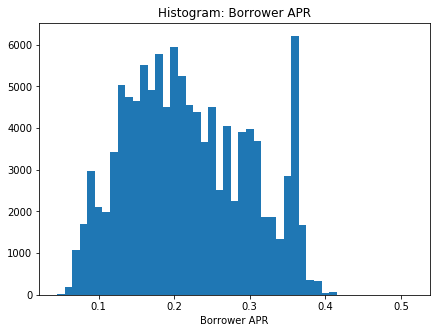

In [40]:
bins = np.arange(0.045, df['BorrowerAPR'].max() + 0.01, 0.01)
plt.subplots(figsize = [7,5])
plt.hist(df['BorrowerAPR'], bins = bins)
plt.title("Histogram: Borrower APR")
plt.xlabel("Borrower APR");

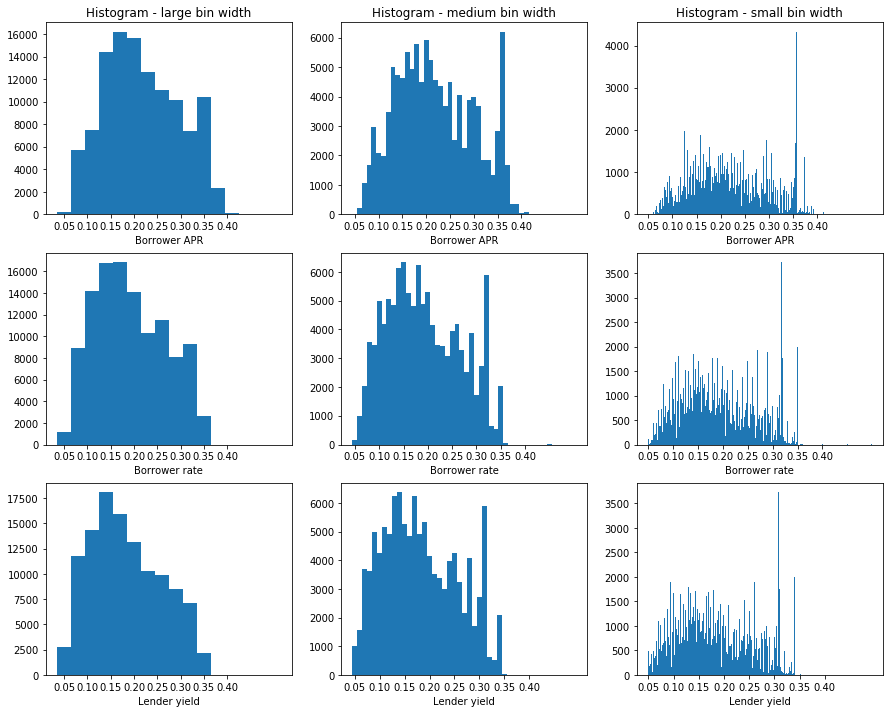

In [41]:
plt.figure(figsize = [15,12])

plt.subplot(3,3,1) # 3 rows x 3 columns - subplot #1
bin_width = 0.03
start = 0.05 - bin_width/2
bin_edges = np.arange(start, df['BorrowerAPR'].max() + bin_width, bin_width)
plt.hist(data = df, x = 'BorrowerAPR', bins = bin_edges)
plt.xticks(np.arange(0.05, 0.40 + 0.05, 0.05))
plt.xlabel('Borrower APR')
plt.title('Histogram - large bin width')

plt.subplot(3,3,2) # 3 rows x 3 columns - subplot #2
bin_width = 0.01
start = 0.05 - bin_width/2
bin_edges = np.arange(start, df['BorrowerAPR'].max() + bin_width, bin_width)
plt.hist(data = df, x = 'BorrowerAPR', bins = bin_edges)
plt.xticks(np.arange(0.05, 0.40 + 0.05, 0.05))
plt.xlabel('Borrower APR')
plt.title('Histogram - medium bin width')

plt.subplot(3,3,3) # 3 rows x 3 columns - subplot #3
bin_width = 0.002
start = 0.05 - bin_width/2
bin_edges = np.arange(start, df['BorrowerAPR'].max() + bin_width, bin_width)
plt.hist(data = df, x = 'BorrowerAPR', bins = bin_edges)
plt.xticks(np.arange(0.05, 0.40 + 0.05, 0.05))
plt.xlabel('Borrower APR')
plt.title('Histogram - small bin width')

plt.subplot(3,3,4) # 3 rows x 3 columns - subplot #4
bin_width = 0.03
start = 0.05 - bin_width/2
bin_edges = np.arange(start, df['BorrowerRate'].max() + bin_width, bin_width)
plt.hist(data = df, x = 'BorrowerRate', bins = bin_edges)
plt.xticks(np.arange(0.05, 0.40 + 0.05, 0.05))
plt.xlabel('Borrower rate')

plt.subplot(3,3,5) # 3 rows x 3 columns - subplot #5
bin_width = 0.01
start = 0.05 - bin_width/2
bin_edges = np.arange(start, df['BorrowerRate'].max() + bin_width, bin_width)
plt.hist(data = df, x = 'BorrowerRate', bins = bin_edges)
plt.xticks(np.arange(0.05, 0.40 + 0.05, 0.05))
plt.xlabel('Borrower rate')

plt.subplot(3,3,6) # 3 rows x 3 columns - subplot #6
bin_width = 0.002
start = 0.05 - bin_width/2
bin_edges = np.arange(start, df['BorrowerRate'].max() + bin_width, bin_width)
plt.hist(data = df, x = 'BorrowerRate', bins = bin_edges)
plt.xticks(np.arange(0.05, 0.40 + 0.05, 0.05))
plt.xlabel('Borrower rate')

plt.subplot(3,3,7) # 3 rows x 3 columns - subplot #7
bin_width = 0.03
start = 0.05 - bin_width/2
bin_edges = np.arange(start, df['LenderYield'].max() + bin_width, bin_width)
plt.hist(data = df, x = 'LenderYield', bins = bin_edges)
plt.xticks(np.arange(0.05, 0.40 + 0.05, 0.05))
plt.xlabel('Lender yield')

plt.subplot(3,3,8) # 3 rows x 3 columns - subplot #8
bin_width = 0.01
start = 0.05 - bin_width/2
bin_edges = np.arange(start, df['LenderYield'].max() + bin_width, bin_width)
plt.hist(data = df, x = 'LenderYield', bins = bin_edges)
plt.xticks(np.arange(0.05, 0.40 + 0.05, 0.05))
plt.xlabel('Lender yield')

plt.subplot(3,3,9) # 3 rows x 3 columns - subplot #9
bin_width = 0.002
start = 0.05 - bin_width/2
bin_edges = np.arange(start, df['LenderYield'].max() + bin_width, bin_width)
plt.hist(data = df, x = 'LenderYield', bins = bin_edges)
plt.xticks(np.arange(0.05, 0.40 + 0.05, 0.05))
plt.xlabel('Lender yield');

In [42]:
rate_cols = ['BorrowerAPR', 'BorrowerRate', 'LenderYield']

print('top 3 value counts:')

for col in rate_cols:
    x = df[col].value_counts().to_frame()
    print('\n')
    print(x.head(3))

top 3 value counts:


         BorrowerAPR
0.35797         3672
0.35643         1644
0.37453         1260


        BorrowerRate
0.3177          3672
0.3500          1905
0.3199          1651


        LenderYield
0.3077         3672
0.3400         1916
0.3099         1651


NameError: name 'dfx' is not defined

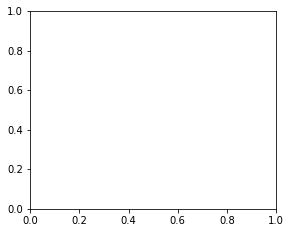

In [43]:
plt.figure(figsize = [15,8])

plt.subplot(2,3,1) # 2 rows x 3 columns - subplot #1
bin_edges = np.arange(550, dfx['CreditScoreRangeUpper'].max() + 30, 30)
plt.hist(data = dfx, x = 'CreditScoreRangeLower', bins = bin_edges)
plt.xlabel('CreditScoreRangeLower, bin width 30')
plt.title('Histogram - large bin width')

plt.subplot(2,3,2) # 2 rows x 3 columns - subplot #2
bin_edges = np.arange(550, dfx['CreditScoreRangeUpper'].max() + 10, 10)
plt.hist(data = dfx, x = 'CreditScoreRangeLower', bins = bin_edges)
plt.xlabel('CreditScoreRangeLower, bin width 10')
plt.title('Histogram - medium bin width')

plt.subplot(2,3,3) # 2 rows x 3 columns - subplot #3
bin_edges = np.arange(550, dfx['CreditScoreRangeUpper'].max() + 5, 5)
plt.hist(data = dfx, x = 'CreditScoreRangeLower', bins = bin_edges)
plt.xlabel('CreditScoreRangeLower, bin width 5')
plt.title('Histogram - small bin width')

plt.subplot(2,3,4) # 2 rows x 3 columns - subplot #4
bin_edges = np.arange(550, dfx['CreditScoreRangeUpper'].max() + 30, 30)
plt.hist(data = dfx, x = 'CreditScoreRangeUpper', bins = bin_edges)
plt.xlabel('CreditScoreRangeUpper')

plt.subplot(2,3,5) # 2 rows x 3 columns - subplot #5
bin_edges = np.arange(550, dfx['CreditScoreRangeUpper'].max() + 10, 10)
plt.hist(data = dfx, x = 'CreditScoreRangeUpper', bins = bin_edges)
plt.xlabel('CreditScoreRangeUpper')

plt.subplot(2,3,6) # 2 rows x 3 columns - subplot #6
bin_edges = np.arange(550, dfx['CreditScoreRangeUpper'].max() + 5, 5)
plt.hist(data = dfx, x = 'CreditScoreRangeUpper', bins = bin_edges)
plt.xlabel('CreditScoreRangeUpper');

In [ ]:
x = (dfx.CreditScoreRangeLower + dfx.CreditScoreRangeUpper)/2
x.hist(bins=100);

In [ ]:
y = dfx.CreditScoreRangeUpper/dfx.CreditScoreRangeLower
list(y.value_counts().index)

In [ ]:
y = dfx.CreditScoreRangeLower
list(y.value_counts().index)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [ ]:
numeric_vars = ['BorrowerAPR', 'CreditScoreRangeLower', 'ProsperScore']
categoric_vars = ['Term', 'LoanStatus', 'ListingCategory', 'IncomeRange']

In [ ]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(dfx[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

In [ ]:
# plot matrix: sample 500 loans so that plots are clearer and
# they render faster
samples = np.random.choice(dfx.shape[0], 500, replace = False)
dfx_samp = dfx.loc[samples,:]

g = sb.PairGrid(data = dfx_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

In [ ]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler

samples = np.random.choice(dfx.shape[0], 2000, replace = False)
dfx_samp = dfx.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = dfx_samp, y_vars = ['BorrowerAPR', 'CreditScoreRangeLower', 'ProsperScore'], x_vars = ['Term', 'IncomeRange'],
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!